In [27]:
import json
import numpy as np
import matplotlib.pyplot as plt

# Opening JSON file
f = open('results.json')
  
# returns JSON object as 
# a dictionary
data = json.load(f)
  
# Closing file
f.close()

res = {
        "COUNT(*)": [],
        "COUNT(1)": [],
        "COUNT(id)": [],
        "COUNT(fni)": [],
        "COUNT(fwi)": [],
        "COUNT(fni_nn)": [],
        "COUNT(fwi_nn)": [],
    }
keys = []
for key, value in data.items():
  keys.append(int(key))
  for key1, value1 in value.items():
    res[key1].append(value1)



res = {key: np.array(value) for key, value in res.items()}
# res

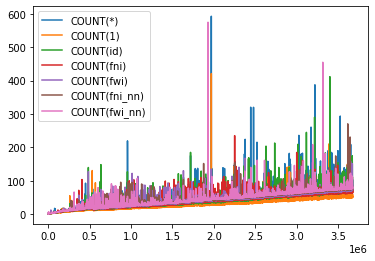

In [28]:
fig, ax = plt.subplots()
for key, value in res.items():
  ax.plot(keys, value, label = key)

ax.legend()
plt.show()

In [29]:
def moving_avg(arr):
  window_size = 101
  
  i = 0
  # Initialize an empty list to store moving averages
  moving_averages = []
    
  # Loop through the array t o
  #consider every window of size 3
  while i < len(arr) - window_size + 1:
    
      # Calculate the average of current window
      window_average = round(np.sum(arr[
        i:i+window_size]) / window_size, 2)
        
      # Store the average of current
      # window in moving average list
      moving_averages.append(window_average)
        
      # Shift window to right by one position
      i += 1
  return np.array(moving_averages)
  

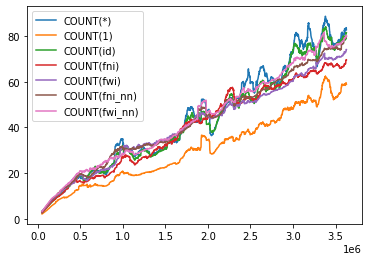

In [30]:
fig, ax = plt.subplots()
for key, value in res.items():
  ax.plot(keys[50:-50], moving_avg(value), label = key)

ax.legend()
plt.show()